In [61]:
#Import des librairies
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')




In [2]:
#Scraping de données
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('today')

df = web.DataReader('AAPL', data_source='yahoo', start=start, end=end)

In [3]:
# Taille des données
df.shape

(2251, 6)

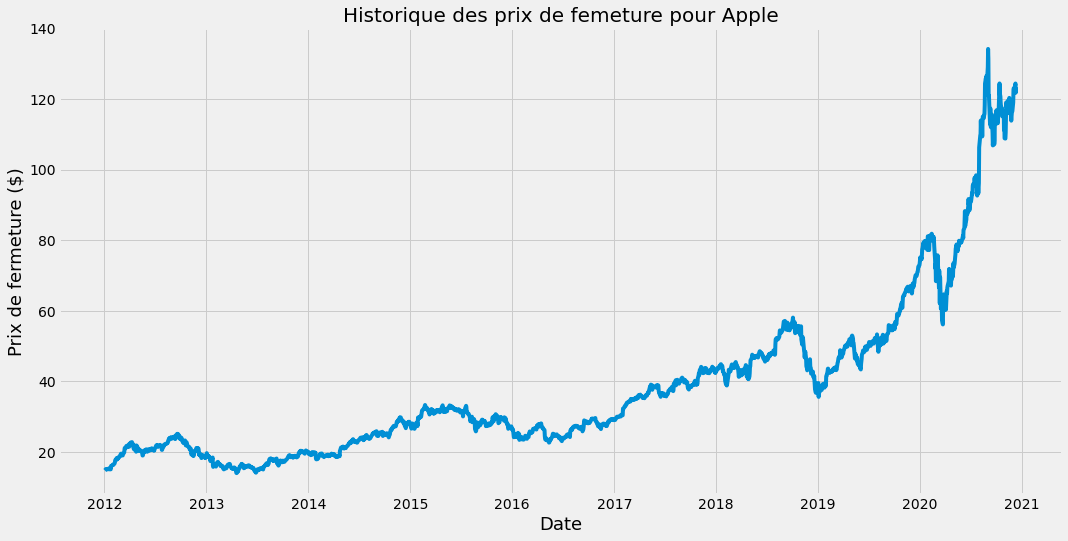

In [4]:
# Visualisation des prix de fermeture
plt.figure(figsize=(16,8))
plt.title('Historique des prix de femeture pour Apple', fontsize=20)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Prix de fermeture ($)', fontsize=18)
plt.show()

In [5]:
#On ne s'intéresse qu'aux prix de fermeture
data = df.filter(['Close'])

#On convertit les données en numpy array
dataset = data.values
#Taille des données d'entraînement
training_data_len = int(len(dataset) * 0.8)
training_data_len

1800

In [6]:
#Création des données d'entraînement
train_data = dataset[0:training_data_len, :]
#Création de X_train and y_train
X_train = []
y_train = []

for k in range(60,len(train_data)):
    X_train.append(train_data[k-60:k,0])
    y_train.append(train_data[k,0]-train_data[k-1,0])


In [10]:
#On met les données d'entraînement en numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

2.802501678466797

In [78]:
#Modèle SVC
model=SVR(C=100,gamma=0.1)

In [87]:
#Entraînement
model=SVR(C=10,gamma=0.001)
model.fit(X_train,y_train)
print (model.score(X_train,y_train))
print (model.score(X_test,y_test))

0.3782890021982712
-0.06802455992007617


In [88]:
#Création des données de test
test_data = dataset[training_data_len - 60: , :]
#Création de X_test et y_test
X_test=[]
y_test = []
y_naif = []

for k in range(60,len(test_data)):
    X_test.append(test_data[k-60:k,0])
    y_test.append(test_data[k,0]-test_data[k-1,0])
    y_naif.append(test_data[k-1,0]-test_data[k-2,0])

In [89]:
#On met les données d'entraînement en numpy array
X_test, y_test, y_naif = np.array(X_test), np.array(y_test), np.array(y_naif)

In [90]:
prediction = model.predict(X_test)

In [91]:
#Baseline
rmse = np.sqrt(np.mean(y_naif- y_test)**2)
rmse

0.004190686008089662

In [92]:
#Calcul de l'erreur
rmse = np.sqrt(np.mean(prediction - y_test)**2)
rmse

0.17712775454519303

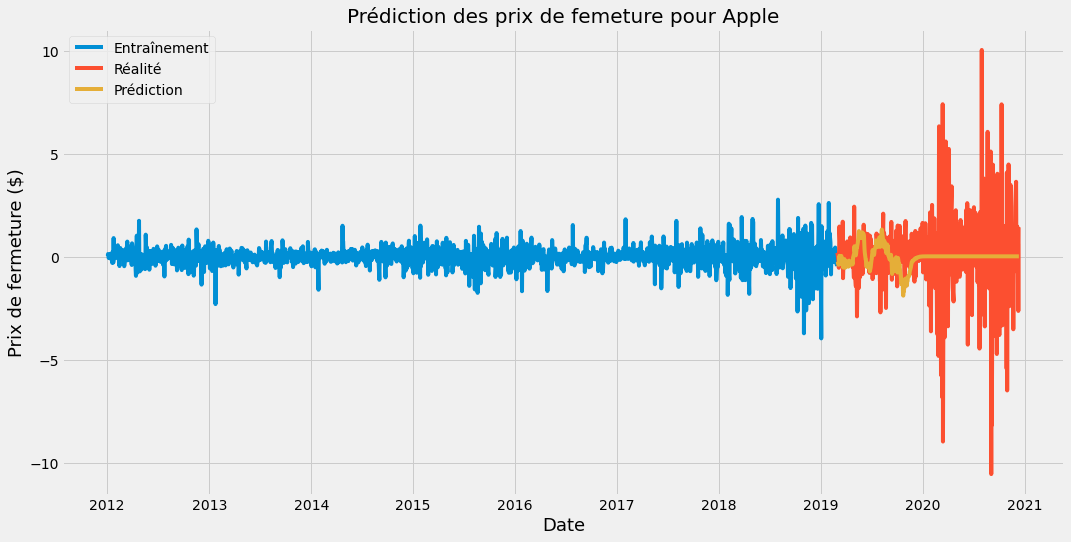

In [94]:
#Visualisation des résultats
train = data[:training_data_len]
close = train['Close']
shift = train['Close'].shift(periods=-1)  
delta_train = shift - close  

test = data[training_data_len:].copy()
test['Prediction']=prediction
close2 = test['Close']
shift2 = test['Close'].shift(periods=-1)  
delta_test = shift2 - close2 



plt.figure(figsize=(16,8))
plt.title('Prédiction des prix de femeture pour Apple', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Prix de fermeture ($)', fontsize=18)
plt.plot(delta_train)
plt.plot(delta_test)
plt.plot(test['Prediction'])
plt.legend(['Entraînement','Réalité','Prédiction'])
plt.show()